In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
class Perceptron:
    """
        It will be tested with Iris dataset from scikit-learn
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


In [41]:
iris = load_iris()
iris_dataframe = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)

In [42]:
iris_dataframe.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [43]:
y = iris_dataframe.iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", -1, 1)

In [44]:
X = iris_dataframe.iloc[0:100, [0, 2]].values

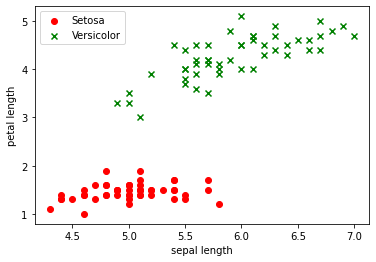

In [45]:
plt.scatter(X[:50, 0], X[:50, 1], color="red", marker="o", label="Setosa")
plt.scatter(X[50:100, 0], X[50:100, 1], color="green", marker="x", label="Versicolor")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend(loc="best")
plt.show()

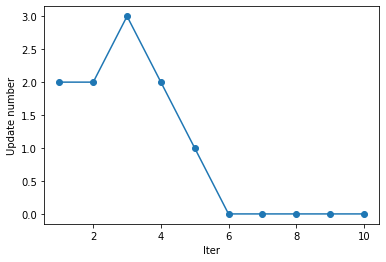

In [66]:
perceptor = Perceptron(eta=0.1, n_iter=10)
#perceptor.errors_
perceptor.fit(X,y)
plt.plot(range(1,len(perceptor.errors_)+1), perceptor.errors_, marker="o")
plt.xlabel("Iter")
plt.ylabel("Update number")
plt.show()